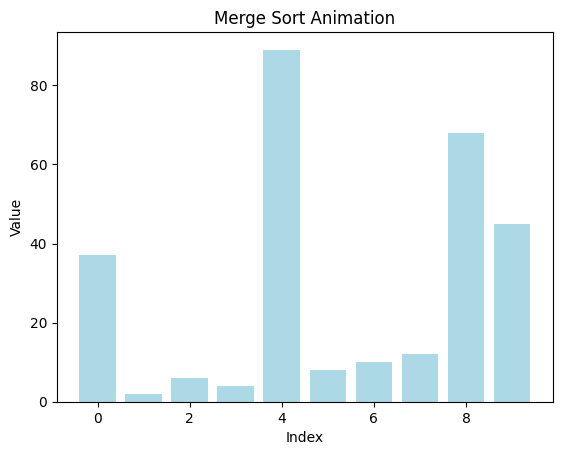

<Figure size 640x480 with 0 Axes>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

def merge(arr, left, mid, right, ax, bars, interval, swaps):
    i = left   
    j = mid + 1 
    k = left    
    temp = arr[left:right + 1]
    
    while i <= mid and j <= right:
        if arr[i] <= arr[j]:
            temp[k - left] = arr[i]
            i += 1
        else:
            temp[k - left] = arr[j]
            j += 1
        k += 1
        update_plot(arr, ax, bars, interval)
    
    while i <= mid:
        temp[k - left] = arr[i]
        i += 1
        k += 1
        update_plot(arr, ax, bars, interval)
        
    while j <= right:
        temp[k - left] = arr[j]
        j += 1
        k += 1
        update_plot(arr, ax, bars, interval)

    for i in range(left, right + 1):
        arr[i] = temp[i - left]
    
    swaps.append((left, right))
    update_plot(arr, ax, bars, interval)

def merge_sort_helper(arr, left, right, ax, bars, interval, swaps):
    if left < right:
        mid = (left + right) // 2
        merge_sort_helper(arr, left, mid, ax, bars, interval, swaps)
        merge_sort_helper(arr, mid + 1, right, ax, bars, interval, swaps)
        merge(arr, left, mid, right, ax, bars, interval, swaps)

def update_plot(arr, ax, bars, interval):
    for bar, val in zip(bars, arr):
        bar.set_height(val)
    plt.pause(interval)

def merge_sort(array):
    fig, ax = plt.subplots()
    bars = ax.bar(range(len(array)), array, color='lightblue')
    ax.set_title('Merge Sort Animation')
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')

    swaps = []
    interval = 0.1  

    writer = animation.FFMpegWriter(fps=30, metadata=dict(artist='Me'), bitrate=1800)

    with writer.saving(fig, "mergesort_animation.mp4", dpi=200):
        merge_sort_helper(array, 0, len(array) - 1, ax, bars, interval, swaps)
        
        for bar in bars:
            bar.set_color('green')

        plt.draw()
        writer.grab_frame()

array = [37, 2, 6, 4, 89, 8, 10, 12, 68, 45]

merge_sort(array)